In [78]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [79]:
data = pd.read_csv('day.csv')
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### UNDERSTAND DATA

In [80]:
data.shape

(730, 16)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [82]:
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [83]:
# CHECK NULLS
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [84]:
# DROP COLUNS
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [85]:
# MAP VALUES TO LABELS
data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data.weekday  = data.weekday .map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow_rain',4:'Heavy_snow_rain'})
data.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0       Mist  14.110847   
1  spring     0   jan        0     sun           0       Mist  14.902598   
2  spring     0   jan        0     mon           1      Clear   8.050924   
3  spring     0   jan        0     tue           1      Clear   8.200000   
4  spring     0   jan        0     wed           1      Clear   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

### DATA VISUALIZATION

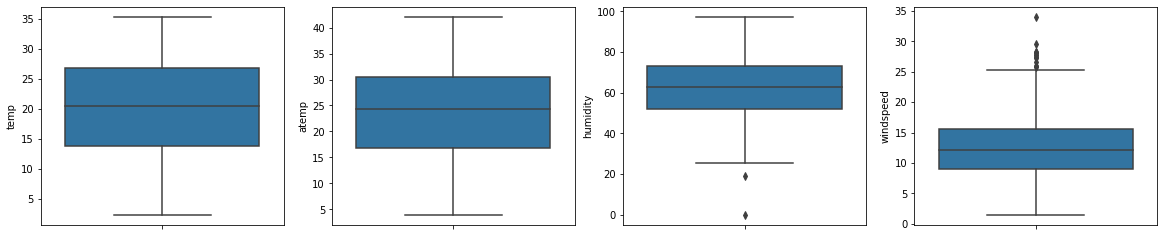

In [86]:
# check for outliers

cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

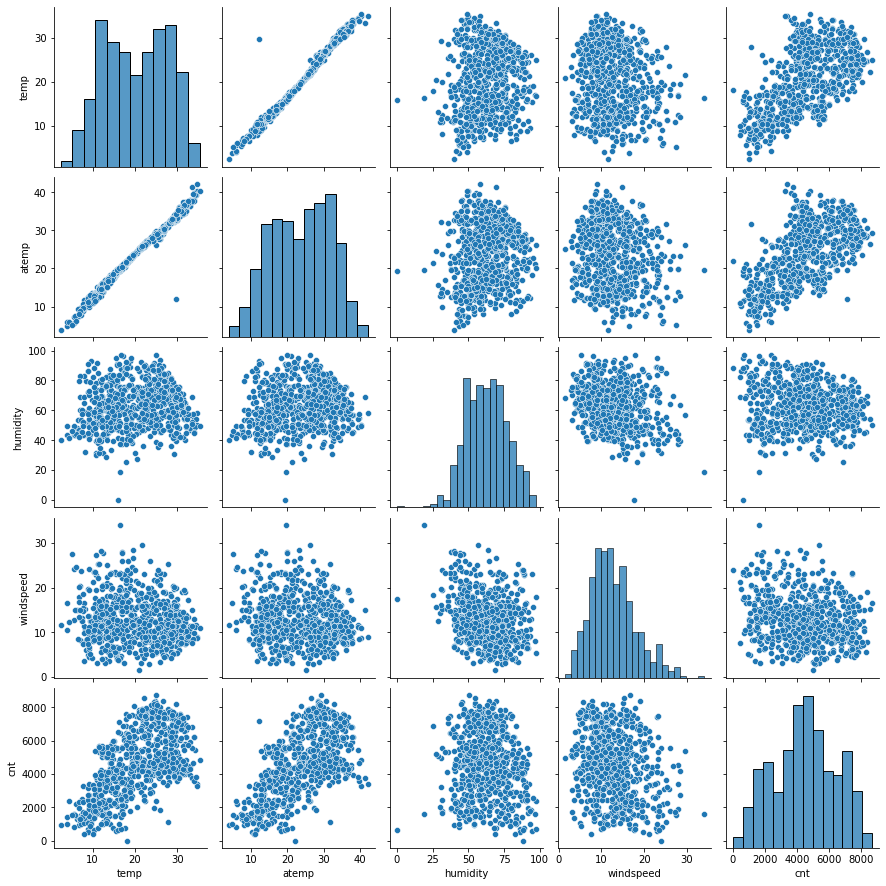

In [87]:
#Pair plot
sns.pairplot(data=data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

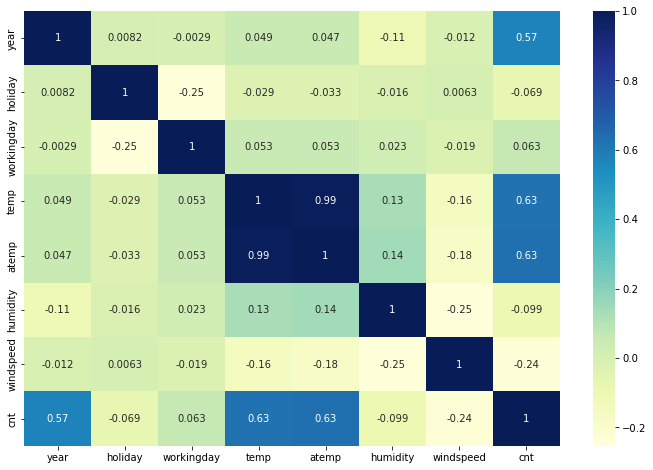

In [88]:
#correlation coefficient

plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

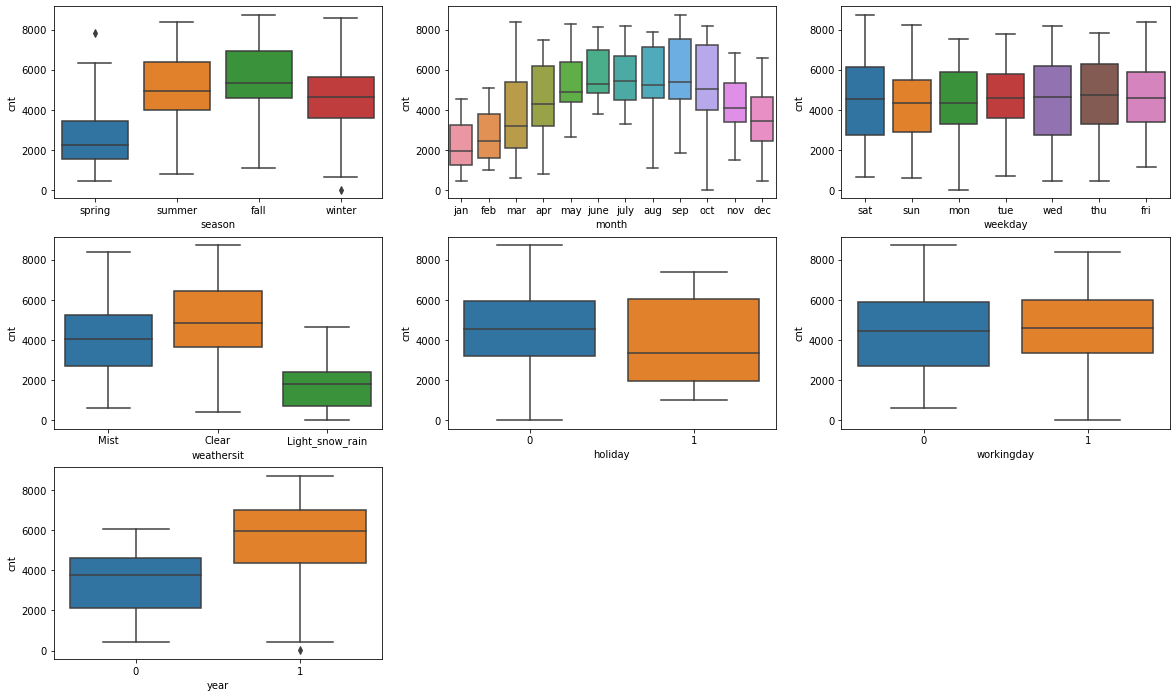

In [89]:
#category data
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'cnt', data = data)
plt.show()

### Insights from above

-  Fall has highest rental demand
-  Demand is lowest in the starting and ending months of the year
-  Not much variation of data during weekdays and weekends
-  Clear weathersit is highest
-  Demands are increased in holidays
-  Demand grows more in the next year


### Data prep

In [90]:
data = pd.get_dummies(data=data,columns=["season","month","weekday","weathersit"],drop_first=True)
data.head()

year  holiday  workingday       temp     atemp  humidity  windspeed   cnt  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882   985   
1     0        0           0  14.902598  17.68695   69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300  1600   

   season_spring  season_summer  ...  month_oct  month_sep  weekday_mon  \
0              1              0  ...          0          0            0   
1              1              0  ...          0          0            0   
2              1              0  ...          0          0            1   
3              1              0  ...          0          0            0   
4              1              0  ...          0          0            0   

   weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
0            1            0            0            0            0   
1            0            1            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            1   

   weathersit_Light_snow_rain  weathersit_Mist  
0                           0                1  
1                           0                1  
2                           0                0  
3                           0                0  
4                           0                0  

[5 rows x 30 columns]

In [91]:
data.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')

### Build model

In [92]:
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [93]:
df_train.shape

(510, 30)

In [94]:
df_test.shape

(219, 30)

In [95]:
# rescale
scaler = MinMaxScaler()
df_train.head()

year  holiday  workingday       temp    atemp  humidity  windspeed   cnt  \
653     1        0           1  19.201653  23.0423   55.8333  12.208807  7534   
576     1        0           1  29.246653  33.1448   70.4167  11.083475  7216   
426     1        0           0  16.980847  20.6746   62.1250  10.792293  4066   
728     1        0           0  10.489153  11.5850   48.3333  23.500518  1796   
482     1        0           0  15.443347  18.8752   48.9583   8.708325  4220   

     season_spring  season_summer  ...  month_oct  month_sep  weekday_mon  \
653              0              0  ...          1          0            0   
576              0              0  ...          0          0            0   
426              1              0  ...          0          0            0   
728              1              0  ...          0          0            0   
482              0              1  ...          0          0            0   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
653            0            0            0            1            0   
576            0            0            0            1            0   
426            1            0            0            0            0   
728            0            1            0            0            0   
482            1            0            0            0            0   

     weathersit_Light_snow_rain  weathersit_Mist  
653                           0                0  
576                           0                0  
426                           0                1  
728                           0                0  
482                           0                1  

[5 rows x 30 columns]

In [96]:
# apply scale
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
653     1        0           1  0.509887  0.501133  0.575354   0.300794   
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           0  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_spring  season_summer  ...  month_oct  month_sep  \
653  0.864243              0              0  ...          1          0   
576  0.827658              0              0  ...          0          0   
426  0.465255              1              0  ...          0          0   
728  0.204096              1              0  ...          0          0   
482  0.482973              0              1  ...          0          0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
653            0            0            0            0            1   
576            0            0            0            0            1   
426            0            1            0            0            0   
728            0            0            1            0            0   
482            0            1            0            0            0   

     weekday_wed  weathersit_Light_snow_rain  weathersit_Mist  
653            0                           0                0  
576            0                           0                0  
426            0                           0                1  
728            0                           0                0  
482            0                           0                1  

[5 rows x 30 columns]

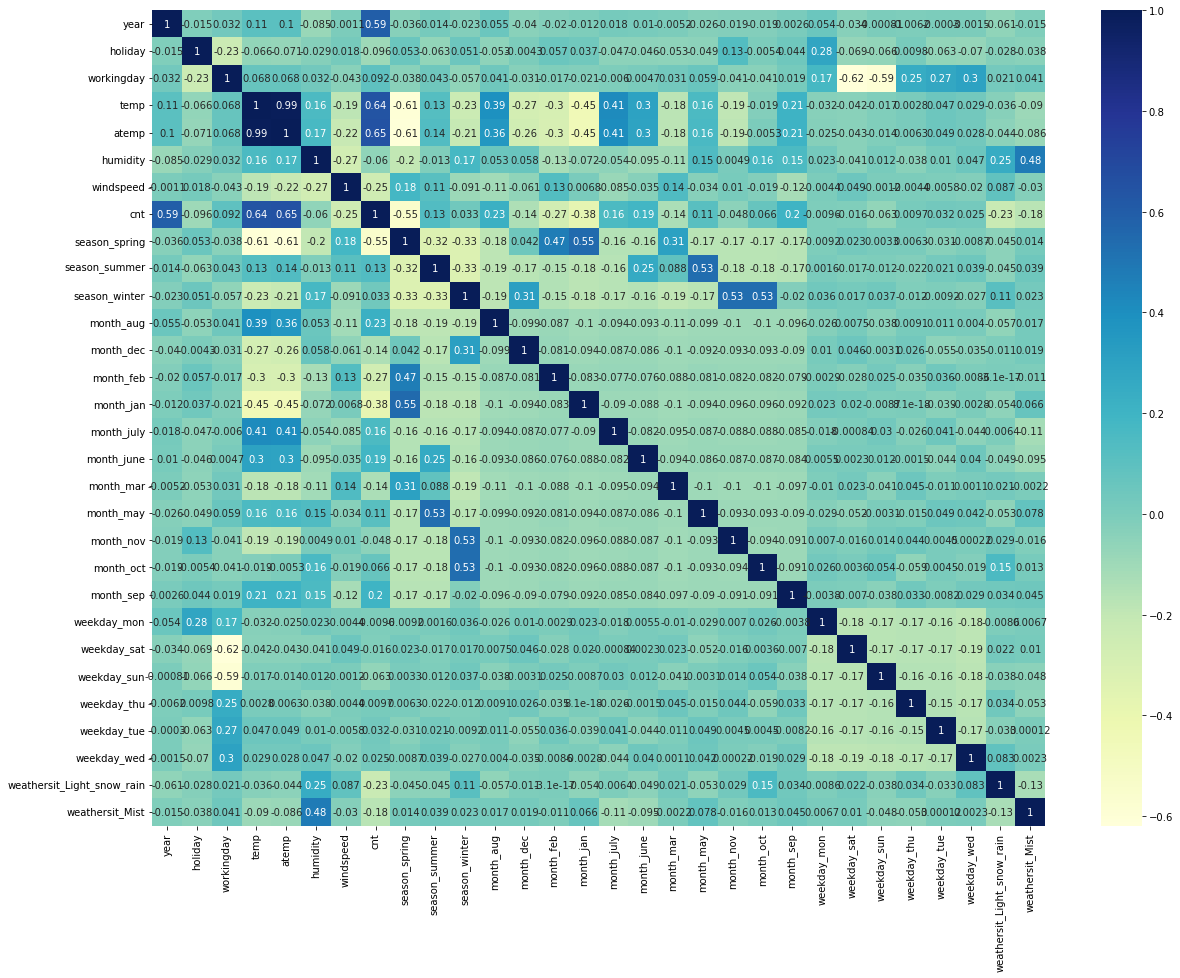

In [97]:
#Correlation
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### year, temp are correlated with cnt

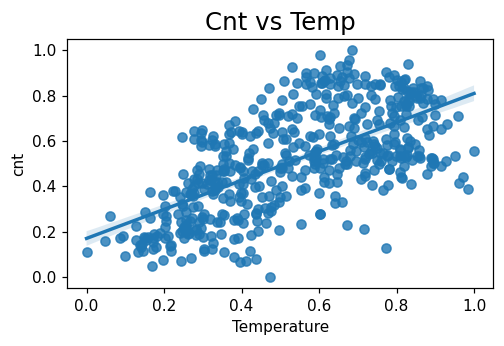

In [98]:
plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df_train,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

### model building X and Y

In [99]:
y_train = df_train.pop('cnt')
X_train = df_train

In [100]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [101]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 8),
 ('month_dec', False, 4),
 ('month_feb', False, 5),
 ('month_jan', False, 2),
 ('month_july', True, 1),
 ('month_june', False, 13),
 ('month_mar', False, 15),
 ('month_may', False, 7),
 ('month_nov', False, 3),
 ('month_oct', False, 11),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 14),
 ('weathersit_Light_snow_rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [102]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')


In [103]:
X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [104]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [105]:
X_train_rfe = X_train[col]
calculateVIF(X_train_rfe)

Features    VIF
2                   workingday  50.69
11                 weekday_sat  12.20
12                 weekday_sun  11.79
6                season_spring   5.02
3                         temp   3.62
8                season_winter   3.49
1                      holiday   2.91
7                season_summer   2.61
4                     humidity   1.91
14             weathersit_Mist   1.57
9                   month_july   1.49
10                   month_sep   1.30
13  weathersit_Light_snow_rain   1.25
5                    windspeed   1.20
0                         year   1.03

### linear model

In [106]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.13e-191
Time:                        19:43:47   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [107]:
# HIGH VIF, drop humidity
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
2                   workingday  35.88
10                 weekday_sat   8.96
11                 weekday_sun   8.41
5                season_spring   4.96
3                         temp   3.38
7                season_winter   3.36
6                season_summer   2.59
1                      holiday   2.34
8                   month_july   1.48
9                    month_sep   1.29
4                    windspeed   1.10
12  weathersit_Light_snow_rain   1.05
13             weathersit_Mist   1.05
0                         year   1.02

#### build 2nd model

In [108]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.73e-189
Time:                        19:43:48   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [109]:
# drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
1                   workingday  16.19
2                         temp  12.73
3                    windspeed   4.75
9                  weekday_sat   4.45
10                 weekday_sun   4.21
4                season_spring   3.82
6                season_winter   2.80
5                season_summer   2.75
0                         year   2.07
7                   month_july   1.60
12             weathersit_Mist   1.58
8                    month_sep   1.35
11  weathersit_Light_snow_rain   1.09

In [110]:
# 3rd model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.73e-189
Time:                        19:43:49   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [112]:
# drop month_july variable as it has high p-value
X_train_new = X_train_new.drop(['month_july'], axis = 1)

calculateVIF(X_train_new)

Features    VIF
1                   workingday  16.11
2                         temp  11.92
3                    windspeed   4.75
8                  weekday_sat   4.42
9                  weekday_sun   4.18
4                season_spring   3.66
6                season_winter   2.57
5                season_summer   2.36
0                         year   2.07
11             weathersit_Mist   1.58
7                    month_sep   1.23
10  weathersit_Light_snow_rain   1.09

In [113]:
# 4th model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.48e-188
Time:                        19:46:17   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     497   BIC:                            -928.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [114]:
# We can drop season_spring variable as it has high p-value
X_train_new = X_train_new.drop(['season_spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
1                   workingday  8.88
2                         temp  6.99
3                    windspeed  4.32
7                  weekday_sat  2.79
8                  weekday_sun  2.62
0                         year  2.05
4                season_summer  1.57
10             weathersit_Mist  1.57
5                season_winter  1.52
6                    month_sep  1.20
9   weathersit_Light_snow_rain  1.08

In [115]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.92e-188
Time:                        19:46:54   Log-Likelihood:                 501.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     498   BIC:                            -927.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Residual Analysis

In [116]:
lr_5.params

const                         0.027813
year                          0.232913
workingday                    0.104951
temp                          0.547727
windspeed                    -0.154257
season_summer                 0.086798
season_winter                 0.132127
month_sep                     0.099248
weekday_sat                   0.116207
weekday_sun                   0.057089
weathersit_Light_snow_rain   -0.289291
weathersit_Mist              -0.081844
dtype: float64

In [117]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

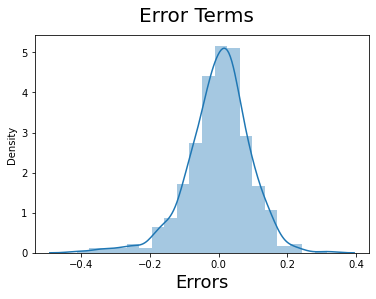

In [118]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### multicolinear check

In [119]:
calculateVIF(X_train_new)

Features   VIF
1                   workingday  8.88
2                         temp  6.99
3                    windspeed  4.32
7                  weekday_sat  2.79
8                  weekday_sun  2.62
0                         year  2.05
4                season_summer  1.57
10             weathersit_Mist  1.57
5                season_winter  1.52
6                    month_sep  1.20
9   weathersit_Light_snow_rain  1.08

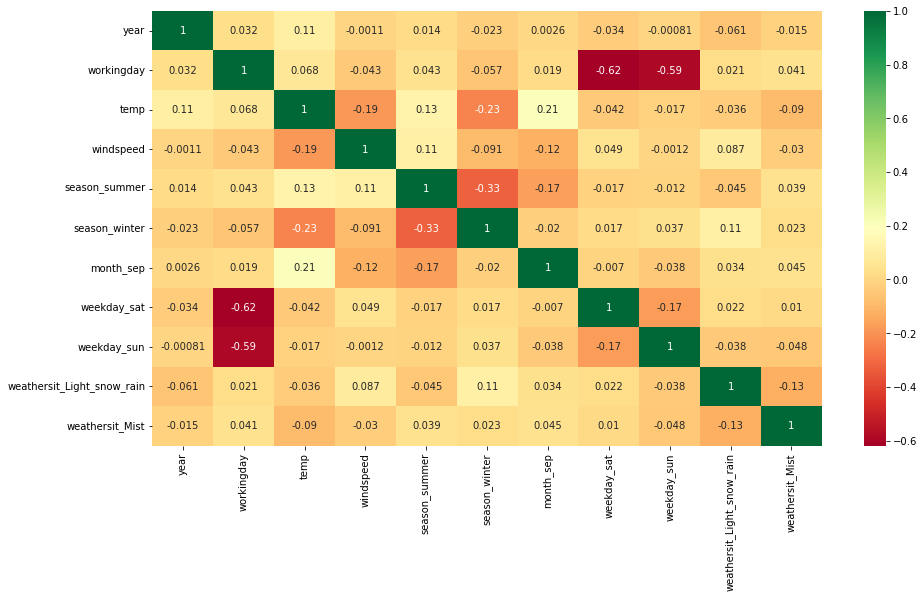

In [120]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### apply scaling to test sets

In [121]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
184     0        1           0  0.831783  0.769660  0.657364   0.084219   
535     1        0           1  0.901354  0.842587  0.610133   0.153728   
299     0        0           1  0.511964  0.496145  0.837699   0.334206   
221     0        0           1  0.881625  0.795343  0.437098   0.339570   
152     0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  season_spring  season_summer  ...  month_oct  month_sep  \
184  0.692706              0              0  ...          0          0   
535  0.712034              0              1  ...          0          0   
299  0.303382              0              0  ...          1          0   
221  0.547400              0              0  ...          0          0   
152  0.569029              0              1  ...          0          0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
184            1            0            0            0            0   
535            0            0            0            0            0   
299            0            0            0            1            0   
221            0            0            0            0            0   
152            0            0            0            1            0   

     weekday_wed  weathersit_Light_snow_rain  weathersit_Mist  
184            0                           0                1  
535            1                           0                0  
299            0                           0                1  
221            1                           0                0  
152            0                           0                0  

[5 rows x 30 columns]

In [122]:
df_test.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt  season_spring  season_summer  ...   month_oct  \
count  219.000000  219.000000     219.000000     219.000000  ...  219.000000   
mean     0.313350    0.520592       0.255708       0.264840  ...    0.082192   
std      0.159947    0.218435       0.437258       0.442259  ...    0.275286   
min     -0.042808    0.048205       0.000000       0.000000  ...    0.000000   
25%      0.198517    0.377531       0.000000       0.000000  ...    0.000000   
50%      0.299459    0.524275       0.000000       0.000000  ...    0.000000   
75%      0.403048    0.672745       1.000000       1.000000  ...    0.000000   
max      0.807474    0.963300       1.000000       1.000000  ...    1.000000   

        month_sep  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
count  219.000000   219.000000   219.000000   219.000000   219.000000   
mean     0.086758     0.127854     0.118721     0.146119     0.164384   
std      0.282125     0.334692     0.324202     0.354034     0.371472   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_tue  weekday_wed  weathersit_Light_snow_rain  weathersit_Mist  
count   219.000000   219.000000                  219.000000       219.000000  
mean      0.164384     0.100457                    0.027397         0.319635  
std       0.371472     0.301297                    0.163612         0.467403  
min       0.000000     0.000000                    0.000000         0.000000  
25%       0.000000     0.000000                    0.000000         0.000000  
50%       0.000000     0.000000                    0.000000         0.000000  
75%       0.000000     0.000000                    0.000000         1.000000  
max       1.000000     1.000000                    1.000000         1.000000  

[8 rows x 30 columns]

#### Divide into x and y test

In [123]:
y_test = df_test.pop('cnt')
X_test = df_test

In [126]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [127]:
y_pred = lr_5.predict(X_test_lm_5)

In [128]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7963

### model evalutation

Text(0, 0.5, 'y_pred')

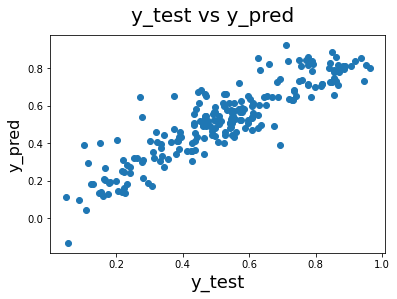

In [129]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [131]:
round(lr_5.params,4)

const                         0.0278
year                          0.2329
workingday                    0.1050
temp                          0.5477
windspeed                    -0.1543
season_summer                 0.0868
season_winter                 0.1321
month_sep                     0.0992
weekday_sat                   0.1162
weekday_sun                   0.0571
weathersit_Light_snow_rain   -0.2893
weathersit_Mist              -0.0818
dtype: float64

In [132]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7855


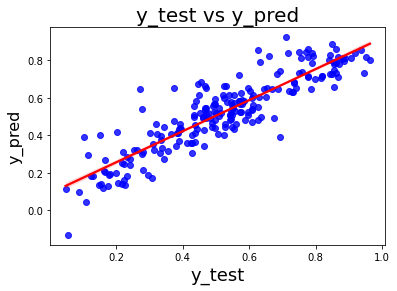

In [133]:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### COMPARISON

- Train dataset R^2 = 0.836
- Train dataset Adjusted R^2 = 0.832
- Test dataset R^2 = 0.7956
- Test dataset Adjusted R^2 = 0.7858